In [9]:
import fitz  # PyMuPDF
import nltk
import os
from nltk.tokenize import word_tokenize

# Make sure to download the NLTK tokenizer
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

def extract_text_and_count_tokens(pdf_path):
    # Open the PDF file
    document = fitz.open(pdf_path)
    
    # Extract text from the first 10 pages
    text = ""
    for page_num in range(min(10, len(document))):
        page = document.load_page(page_num)
        text += page.get_text()
    
    # Split the text into words
    words = text.split()
    
    # Get the number of words
    num_words = len(words)
    
    return num_words

def get_all_pdf_paths(folder_path):
    pdf_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.pdf'):
                pdf_paths.append(os.path.join(root, file))
    return pdf_paths

def process_all_pdfs_in_folder(folder_path):
    pdf_paths = get_all_pdf_paths(folder_path)
    c=0 
    sum =0
    for pdf_path in pdf_paths:
        print(pdf_path)
        num_tokens = extract_text_and_count_tokens(pdf_path)
        print(f"Number of tokens in the first 10 pages of '{pdf_path}': {num_tokens}")
        c+=1
        sum += num_tokens
    print(sum/c)
# Example usage
folder_path = '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1'  # Replace with your folder path
process_all_pdfs_in_folder(folder_path)


/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_18_28_45_48_51_57_60_70_72_79_81_89_91_92_94_95_97_99_102_105_113_117_118_119_122_125_131_132_137_139_150_v2.pdf
Number of tokens in the first 10 pages of '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_18_28_45_48_51_57_60_70_72_79_81_89_91_92_94_95_97_99_102_105_113_117_118_119_122_125_131_132_137_139_150_v2.pdf': 2880
/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_157.pdf
Number of tokens in the first 10 pages of '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_157.pdf': 2009
/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_143.pdf
Number of tokens in the first 10 pages of '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_143.pdf': 506
/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_18_28_45_48_51_57_60_70_72_79_81_89_91_92_94_95_97_99_102_105_113_117_118_119_122_125_131_132_13

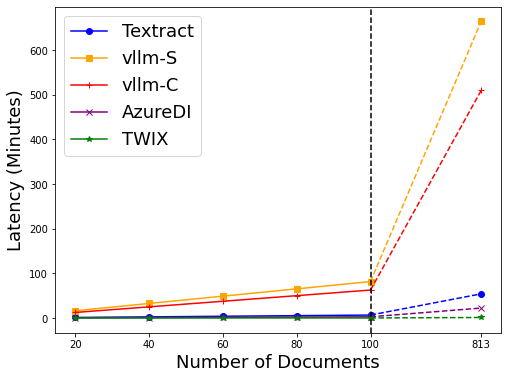

In [12]:
import matplotlib.pyplot as plt


# Define the data points
x = [20, 40, 60, 80, 100, 813]
aws = [78, 158, 241, 322, 401, 3252]
aws = [x / 60 for x in aws]
vllmS = [20*49,40*49,60*49,80*49,100*49,813*49]
vllmS = [x / 60 for x in vllmS]
vllmC = [20*37.6,40*37.6,60*37.6,80*37.6,100*37.6,813*37.6]
vllmC = [x / 60 for x in vllmC]

uc = 1.65
AzureDI = [20*uc,40*uc,60*uc,80*uc,100*uc,813*uc]
AzureDI = [x / 60 for x in AzureDI]

nc = 0.08
RT = [9.7+20*nc,9.7+40*nc,9.8+60*nc,9.8+100*nc,10,10.3+813*nc]
RT = [x / 60 for x in RT]

# Adjust the transformation to compress the 100-1000 section further
x_transformed = [20, 40, 60, 80, 100, 130]  # Compress 100-1000 range further

# Update the existing plot
plt.figure(figsize=(8, 6))

# Plot the main line and separate dashed section
plt.plot(x_transformed[:5], aws[:5], marker='o', color='blue', label='Textract')
plt.plot(x_transformed[4:], aws[4:], marker='o', linestyle='--', color='blue')

plt.plot(x_transformed[:5], vllmS[:5], marker='s', color='orange', label='vllm-S')
plt.plot(x_transformed[4:], vllmS[4:], marker='s', linestyle='--', color='orange')

plt.plot(x_transformed[:5], vllmC[:5], marker='+', color='red', label='vllm-C')
plt.plot(x_transformed[4:], vllmC[4:], marker='+', linestyle='--', color='red')

plt.plot(x_transformed[:5], AzureDI[:5], marker='x', color='purple', label='AzureDI')
plt.plot(x_transformed[4:], AzureDI[4:], marker='x', linestyle='--', color='purple')

plt.plot(x_transformed[:5], RT[:5], marker='*', color='green', label='TWIX')
plt.plot(x_transformed[4:], RT[4:], marker='*', linestyle='--', color='green')


# Add a vertical dashed line at x=100 (transformed)
plt.axvline(x=100, linestyle='--', color='black')

# Customize x-axis ticks to reflect the original scale
plt.xticks(x_transformed, x)
plt.xlabel('Number of Documents',fontsize=18)
plt.ylabel('Latency (Minutes)',fontsize=18)
#plt.title('Custom X-Scale Plot with Enhanced Scaling')
#plt.grid(alpha=0.5)

plt.legend(fontsize=18)

# Show the updated plot
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/latency_scale.pdf', format='pdf',bbox_inches='tight', dpi=300)


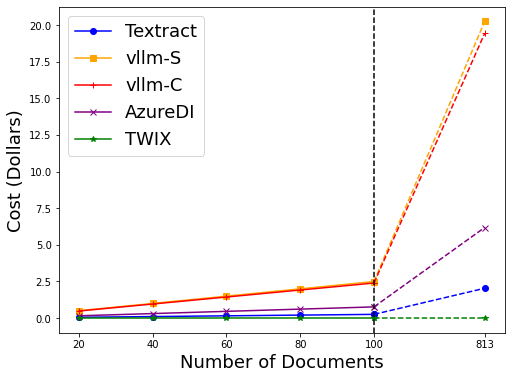

In [10]:
import matplotlib.pyplot as plt


# Define the data points
x = [20, 40, 60, 80, 100, 813]
aws = [20*0.0025,40*0.0025,60*0.0025,80*0.0025,100*0.0025,813*0.0025]
#aws = [x / 60 for x in aws]
uc = 0.0249
vllmS = [20*uc,40*uc,60*uc,80*uc,100*uc,813*uc]
uc = 0.0239
vllmC = [20*uc,40*uc,60*uc,80*uc,100*uc,813*uc]
uc = 0.0076
AzureDI = [20*uc,40*uc,60*uc,80*uc,100*uc,813*uc]
#vllmC = [x / 60 for x in vllmC]
RT = [0.0036,0.0036,0.0036,0.0036,0.0036,0.0036]
#RT = [x / 60 for x in RT]


# Adjust the transformation to compress the 100-1000 section further
x_transformed = [20, 40, 60, 80, 100, 130]  # Compress 100-1000 range further

# Update the existing plot
plt.figure(figsize=(8, 6))

# Plot the main line and separate dashed section
plt.plot(x_transformed[:5], aws[:5], marker='o', color='blue', label='Textract')
plt.plot(x_transformed[4:], aws[4:], marker='o', linestyle='--', color='blue')

plt.plot(x_transformed[:5], vllmS[:5], marker='s', color='orange', label='vllm-S')
plt.plot(x_transformed[4:], vllmS[4:], marker='s', linestyle='--', color='orange')

plt.plot(x_transformed[:5], vllmC[:5], marker='+', color='red', label='vllm-C')
plt.plot(x_transformed[4:], vllmC[4:], marker='+', linestyle='--', color='red')

plt.plot(x_transformed[:5], AzureDI[:5], marker='x', color='purple', label='AzureDI')
plt.plot(x_transformed[4:], AzureDI[4:], marker='x', linestyle='--', color='purple')

plt.plot(x_transformed[:5], RT[:5], marker='*', color='green', label='TWIX')
plt.plot(x_transformed[4:], RT[4:], marker='*', linestyle='--', color='green')


# Add a vertical dashed line at x=100 (transformed)
plt.axvline(x=100, linestyle='--', color='black')

# Customize x-axis ticks to reflect the original scale
plt.xticks(x_transformed, x)
plt.xlabel('Number of Documents',fontsize=18)
plt.ylabel('Cost (Dollars)',fontsize=18)
#plt.title('Custom X-Scale Plot with Enhanced Scaling')
#plt.grid(alpha=0.5)

plt.legend(fontsize=18)

# Show the updated plot
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/cost_scale.pdf', format='pdf',bbox_inches='tight', dpi=300)


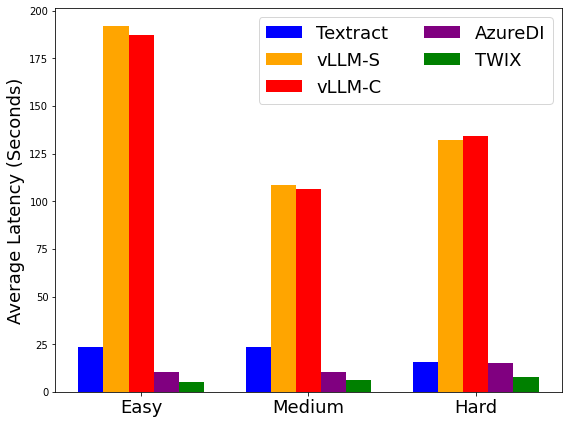

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Data for the bar plot
time = np.array([
    [23.3, 191.8, 187.5, 10.5, 5.1],
    [23.6, 108.7, 106.4, 10.4, 6.23],
    [15.9, 132.1, 134.4, 15, 7.7]
])

# Categories and labels
categories = ['Easy', 'Medium', 'Hard']
bar_labels = ['Textract', 'vLLM-S', 'vLLM-C', 'AzureDI', 'TWIX']

# Create the bar plot
x = np.arange(len(categories))  # the label locations
bar_width = 0.15  # Width of each bar
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'orange', 'red', 'purple', 'green']
# Plot each group of bars
for i in range(time.shape[1]):
    ax.bar(x + i * bar_width, time[:, i], bar_width, label=bar_labels[i], color=colors[i])


# Add labels, title, and custom x-axis tick labels
ax.set_xticks(x + bar_width * (time.shape[1] - 1) / 2)
ax.set_xticklabels(categories, fontsize=18)
ax.set_ylabel('Average Latency (Seconds)',fontsize=18)
ax.legend(ncol=2, loc='upper right', fontsize=18)

# Adjust font size for axes
#ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/latency.pdf', format='pdf',bbox_inches='tight', dpi=300)


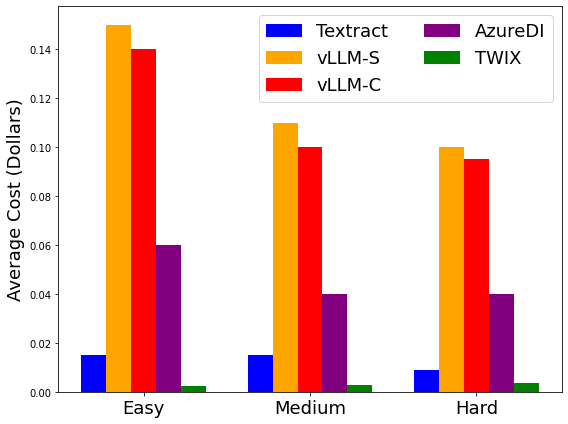

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Data for the bar plot
time = np.array([
    [0.015,0.15,0.14,0.06,0.0024],
    [0.015,0.11,0.1,0.04,0.0028],
    [0.009,0.1,0.095,0.04,0.0037]
])


# Categories and labels
categories = ['Easy', 'Medium', 'Hard']
bar_labels = ['Textract', 'vLLM-S', 'vLLM-C', 'AzureDI', 'TWIX']

# Create the bar plot
x = np.arange(len(categories))  # the label locations
bar_width = 0.15  # Width of each bar
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'orange', 'red', 'purple', 'green']
# Plot each group of bars
for i in range(time.shape[1]):
    ax.bar(x + i * bar_width, time[:, i], bar_width, label=bar_labels[i], color=colors[i])


# Add labels, title, and custom x-axis tick labels
ax.set_xticks(x + bar_width * (time.shape[1] - 1) / 2)
ax.set_xticklabels(categories,fontsize = 18)
ax.set_ylabel('Average Cost (Dollars)',fontsize=18)
ax.legend(ncol=2, loc='upper right', fontsize=18)

# Adjust font size for axes
#ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/cost.pdf', format='pdf',bbox_inches='tight', dpi=300)


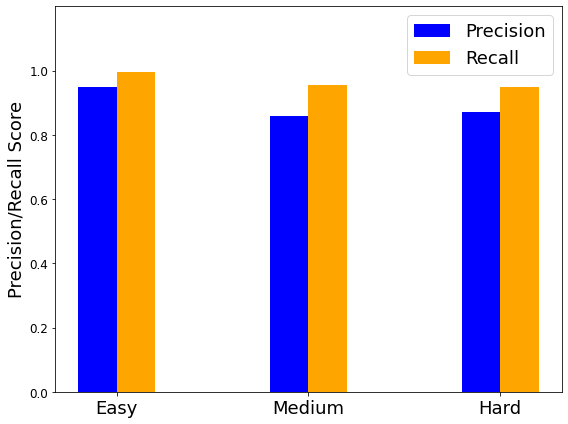

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar plot
time = np.array([
    [0.948, 0.995],
    [0.86, 0.956],
    [0.87, 0.949]
])

# Categories and labels
categories = ['Easy', 'Medium', 'Hard']
bar_labels = ['Precision', 'Recall']

# Create the bar plot
x = np.arange(len(categories))  # the label locations
bar_width = 0.2  # Width of each bar
fig, ax = plt.subplots(figsize=(8, 6))
plt.ylim(0, 1.2)
colors = ['blue', 'orange']

# Plot each group of bars
for i in range(time.shape[1]):
    ax.bar(x + i * bar_width, time[:, i], bar_width, label=bar_labels[i], color=colors[i])

# Add labels, title, and custom x-axis tick labels
ax.set_xticks(x + bar_width * (time.shape[1] - 1) / 2)
ax.set_xticklabels(categories, fontsize=18)
ax.set_ylabel('Precision/Recall Score', fontsize=18)
ax.legend(fontsize=18)

# Customize y-axis ticks and labels
yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Desired tick positions
ax.set_yticks(yticks)  # Set tick positions
ax.set_yticklabels([f"{tick:.1f}" for tick in yticks], fontsize=12)  # Format tick labels

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/field-prediction.pdf', 
            format='pdf', bbox_inches='tight', dpi=300)
